In [ ]:
    
    function issuance() constant returns(uint) {
        uint totalTokens = totalStake + totalSupply;
        uint stakePercentage = 100 * totalStake / totalTokens;
        return totalTokens * saturatingSub(60, stakePercentage) / (stakePercentage**2*100+10000);
    }
    
        
    modifier minimumStake(address nominee) {
        if (nominees[nominee].stake + msg.value < totalStake / nominationDivisor) throw; _;
    }
    
        // Called to receive rewards for a given validator.
    function claimRewards(address validator) isValidator(validator) {
        var nominee = nominees[validator];
        // Number of blocks for which rewards can be claimed.
        uint timeElapsed = block.number - max(validators[validator].added, nominee.lastClaim[msg.sender]);
        // Total issuance at the current issuance level.
        uint currentTotal = issuance() * timeElapsed;
        // Reward scaled by current nominee and nominator stake.
        // everyone * nomineeProportion   *  slashedNominator (scaled as proportion of nominee)
        // total * (nominee / totalStake) * ((nominator * (nominee / initial)) / nominee)
        // total * nominee * nominator / initial / totalStake
        uint reward = currentTotal * nominee.stake * nominee.nominators[msg.sender] / nominee.inputStake / totalStake;
        nominee.lastClaim[msg.sender] = block.number;
        totalSupply += reward;
        if (!msg.sender.send(reward)) throw;
    }

In [1]:
using Gadfly

In [2]:
type User
    stake::Float64
end

In [9]:
users = fill(User(10), 10)

10-element Array{User,1}:
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)
 User(10)

In [ ]:
(staker_reward + staked)/(inflation + total) = staked / total
inflation = staker_reward + dao_reward

In [2]:
STAKING_TARGET = 60

60

In [179]:
INFLATION_LIMIT = 100
BLOCK_TIME = 4
max_inflation(total::Int) = round(Int, total * ((1 + INFLATION_LIMIT)^(BLOCK_TIME/(3600*24*365)) - 1))

max_inflation (generic function with 1 method)

In [180]:
staker_reward(total::Int, stake_percentage::Int) = min(max_inflation(total), div(total * max(STAKING_TARGET - stake_percentage, 0), stake_percentage^2 * 100 + 10000))

staker_reward (generic function with 1 method)

In [181]:
dao_reward(total::Int, stake_percentage::Int) = min(max_inflation(total), div(total * max(stake_percentage - STAKING_TARGET, 0) * 100, stake_percentage^6))
inflation(staker_reward::Int, dao_reward::Int) = staker_reward + dao_reward 

inflation (generic function with 1 method)

In [182]:
a(p) = div(1000000000 * max(p - STAKING_TARGET, 0) * 100, p^5)
a(69)

575

In [183]:
max_inflation(1000000000)

585

In [184]:
DILUTION_TOLERANCE = 0.1

0.1

In [187]:
total = 1000000000
stake = 610010000
dao =   0
totals = []
stakes = []
daos = []
times = 1:BLOCK_TIME:200000
for t in times
    percentage = div(stake * 100, total)
    rew = staker_reward(total, percentage)
    dao_rew = dao_reward(total, percentage)
    stake += rew
    dao += dao_rew

    #stake_addition = round(Int, (DILUTION_TOLERANCE - inf/total)^5 * total)
    total += inflation(rew, dao_rew)
    push!(totals, total)
    push!(daos, dao)
    push!(stakes, stake)
end

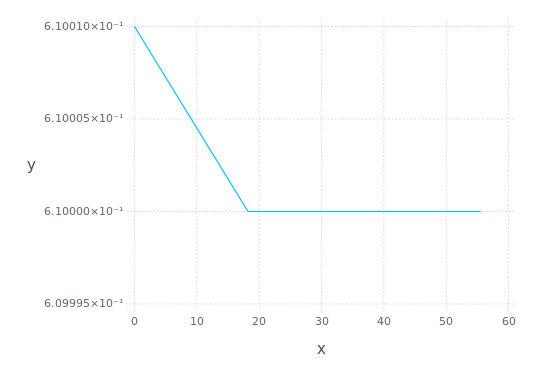

In [188]:
plot(layer(y=stakes./totals, x=times/3600, Geom.line))#, layer(y=daos, x=times/3600, Geom.line))

In [65]:
totals[end]/totals[1]

1.0249998914000633

In [33]:
max_inflation(1000000000)

26

In [190]:
eth_inflation = (1+5/90000000)^(3600*24*365/14) - 1

0.1333103388718262